# OpenCV

https://github.com/opencv/opencv/tree/master/data/haarcascades

### 얼굴정면인식 : haarcascade_frontalface_alt
30도 각도가 넘어가면 얼굴인식에 실패함

얼굴인식 과정
1) 캐스케이드 파일을 지정해서 얼굴 검출기 생성

2) 이미지파일을 읽어들인 후 그레이스케일로 변환(흑백)

3) 얼굴 검출 실행

In [3]:
!pip install opencv-python

얼굴의 좌표 = 319 308 405 405


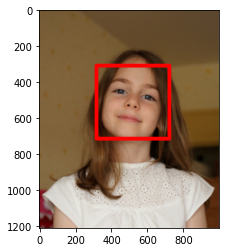

In [4]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 --- (*2)
img = cv2.imread("girl.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

# 결과 확인하기 --- (*4)
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()

    # 인식한 부분 표시하기 --- (*5)
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



## 얼굴에 모자이크 처리 함수

In [7]:
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]

    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)

    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos

    return img2


### 이미지에 모자이크 처리하기

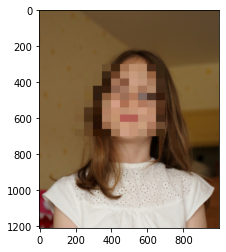

In [10]:
import matplotlib.pyplot as plt
import cv2
# from mosaic import mosaic as mosaic

# 이미지 호출
img = cv2.imread('girl.jpg')
mos = mosaic(img, (200, 300, 700, 700), 10)

# 이미지 출력
cv2.imwrite('girl-mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

## 얼굴인식해서 자동으로 모자이크

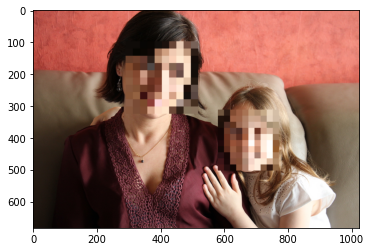

In [12]:
import matplotlib.pyplot as plt
import cv2
#from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기  ------  (※ 1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기  ------  (※ 2)
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기  ------  (※ 3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기  ------  (※ 4)
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
